<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('frcities.csv')

In [4]:
print(data.shape)

(59064, 7)


In [5]:
print(f"how many countries have null population: \n\n{data.isnull().sum()}")

how many countries have null population: 

city              0
lat               0
lng               0
iso2              0
density           1
population    22973
ranking           0
dtype: int64


In [6]:
print(f"index of duplicated rows: (returns True if it's null) \n\n{data.duplicated()}\n\n")
print(f"sum of all duplicated cells: \n\n{data.duplicated().sum()}\n\n")

index of duplicated rows: (returns True if it's null) 

0        False
1        False
2        False
3        False
4        False
         ...  
59059    False
59060    False
59061    False
59062    False
59063    False
Length: 59064, dtype: bool


sum of all duplicated cells: 

0




In [8]:
clean_data = data.dropna(subset=['population']).drop_duplicates(subset='city', keep='first')
print(data.shape)
print(clean_data.shape)
print(clean_data.head())

(59064, 7)
(33481, 7)
                     city      lat     lng iso2  density  population  ranking
1                Louresse  47.2394 -0.3136   FR      NaN       872.0        3
2                   Olmet  45.7100  3.6614   FR     10.4       161.0        3
4             Gottenhouse  48.7208  7.3611   FR    305.6       382.0        3
5                 Bergues  50.9686  2.4342   FR   2755.3      3637.0        2
7  Saint-Martin-d’Arrossa  43.2381 -1.3133   FR     29.2       538.0        3


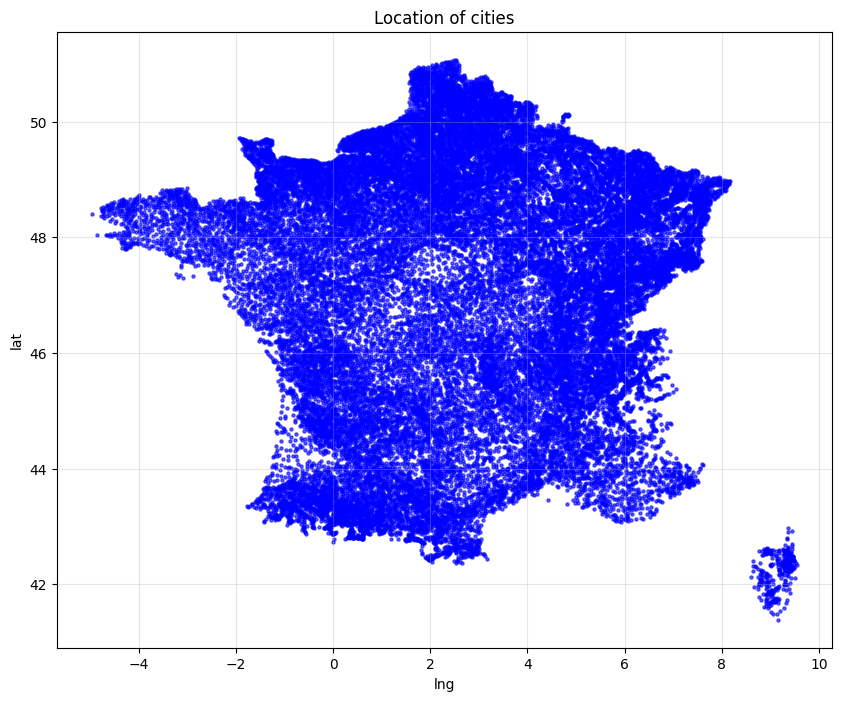

In [10]:
import matplotlib.pyplot as plt

# رسم scatter plot برای موقعیت شهرها (lat و lng)
plt.figure(figsize=(10, 8))
plt.scatter(clean_data['lng'], clean_data['lat'], c='blue', s=5, alpha=0.6)
plt.title('Location of cities')
plt.xlabel('lng')
plt.ylabel('lat')
plt.grid(True, alpha=0.3)
plt.show()

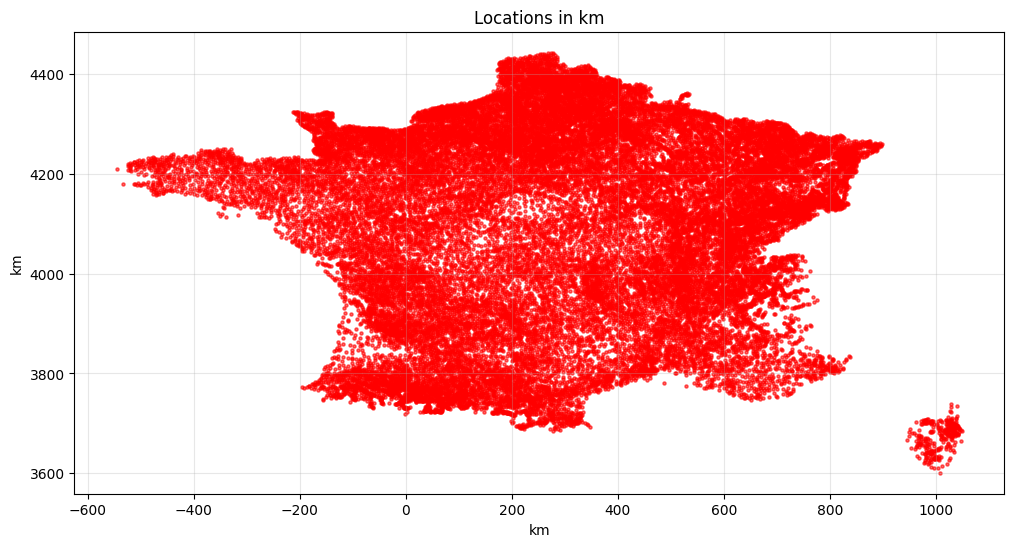

In [11]:
clean_data['lat_km'] = clean_data['lat'].apply(lambda x: x * 87)
clean_data['lng_km'] = clean_data['lng'].apply(lambda x: x * 110)

# رسم مجدد با مقادیر کیلومتری
plt.figure(figsize=(12, 6))
plt.scatter(clean_data['lng_km'], clean_data['lat_km'], c='red', s=5, alpha=0.6)
plt.title('Locations in km')
plt.xlabel('km')
plt.ylabel('km')
plt.grid(True, alpha=0.3)
plt.show()

In [12]:
clean_data['area'] = clean_data['population'] / clean_data['density']
clean_data['area'] = clean_data['area'].where(clean_data['density'] > 0)

print(clean_data[['city', 'population', 'density', 'area']].head(10))

                      city  population  density       area
1                 Louresse       872.0      NaN        NaN
2                    Olmet       161.0     10.4  15.480769
4              Gottenhouse       382.0    305.6   1.250000
5                  Bergues      3637.0   2755.3   1.320001
7   Saint-Martin-d’Arrossa       538.0     29.2  18.424658
8                    Marre       163.0     16.0  10.187500
9             Neuve-Maison       614.0     72.9   8.422497
10               Housseras       486.0     24.8  19.596774
11                 Charmes       396.0     48.4   8.181818
13                 Fomerey       154.0     30.6   5.032680


In [13]:
sum_digits = 26  # 40405184


if sum_digits <= 23:
    center_lat, center_lng = 43, 2
elif 24 <= sum_digits <= 27:
    center_lat, center_lng = 45, 3
elif 28 <= sum_digits <= 30:
    center_lat, center_lng = 47, 0
else:
    center_lat, center_lng = 49, 2.5

print(f"Center point: ({center_lat}, {center_lng})")

Center point: (45, 3)


In [14]:
import numpy as np

# تبدیل مختصات مرکز به کیلومتر
center_lat_km = center_lat * 87
center_lng_km = center_lng * 110

# محاسبه فاصله اقلیدسی هر شهر از مرکز (در مقیاس کیلومتر)
distances = np.sqrt(
    (clean_data['lat_km'] - center_lat_km)**2 +
    (clean_data['lng_km'] - center_lng_km)**2
)

# شهرهایی که فاصله‌شون <= 100 کیلومتره
nearby_cities = clean_data[distances <= 100].copy()
nearby_cities['distance_km'] = distances[distances <= 100]

# مرتب‌سازی بر اساس فاصله
nearby_cities = nearby_cities.sort_values('distance_km')

# نمایش نتیجه
print(f"تعداد شهرهای در شعاع 100 کیلومتری: {len(nearby_cities)}")
print(nearby_cities[['city', 'lat', 'lng', 'population', 'distance_km']].head(10))

# ذخیره در فایل (اختیاری)
nearby_cities.to_csv('nearby_cities.csv', index=False)
print("فایل nearby_cities.csv ذخیره شد.")

تعداد شهرهای در شعاع 100 کیلومتری: 1174
             city      lat     lng  population  distance_km
58389  Les Ternes  44.9983  3.0136       579.0     1.503293
22590   Tanavelle  45.0228  2.9983       229.0     1.992395
46093     Sériers  44.9764  3.0394       131.0     4.795747
27857     Roffiac  45.0525  3.0381       618.0     6.198914
33337  Neuvéglise  44.9281  2.9833      1123.0     6.519459
34428   Lavastrie  44.9353  3.0422       247.0     7.296073
48363      Cussac  44.9836  2.9325       124.0     7.560845
39104    Coltines  45.0933  2.9878       447.0     8.227289
18098     Andelat  45.0606  3.0614       469.0     8.568116
35119   Valuéjols  45.0531  2.9339       564.0     8.614469
فایل nearby_cities.csv ذخیره شد.


In [15]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import numpy as np

# فقط ردیف‌هایی که هم population و هم area و هم density مقدار داشته باشن
valid_data = clean_data.dropna(subset=['population', 'area', 'density', 'lat'])

print(f"تعداد نمونه‌های معتبر برای همبستگی: {len(valid_data)}")

# تابع کمکی برای محاسبه و چاپ همبستگی
def print_corr(name, corr_func, x, y):
    corr, p_val = corr_func(x, y)
    print(f"{name}:")
    print(f"   ضریب همبستگی = {corr:.4f}")
    print(f"   p-value = {p_val:.2e}")
    print()

# 1. همبستگی بین population و area
print("=== همبستگی population و area ===")
print_corr("Pearson", pearsonr, valid_data['population'], valid_data['area'])
print_corr("Spearman", spearmanr, valid_data['population'], valid_data['area'])
print_corr("Kendall Tau", kendalltau, valid_data['population'], valid_data['area'])

# 2. همبستگی بین density و lat
print("=== همبستگی density و lat ===")
print_corr("Pearson", pearsonr, valid_data['density'], valid_data['lat'])
print_corr("Spearman", spearmanr, valid_data['density'], valid_data['lat'])
print_corr("Kendall Tau", kendalltau, valid_data['density'], valid_data['lat'])

تعداد نمونه‌های معتبر برای همبستگی: 33478
=== همبستگی population و area ===
Pearson:
   ضریب همبستگی = 0.7258
   p-value = 0.00e+00

Spearman:
   ضریب همبستگی = 0.3454
   p-value = 0.00e+00

Kendall Tau:
   ضریب همبستگی = 0.2373
   p-value = 0.00e+00

=== همبستگی density و lat ===
Pearson:
   ضریب همبستگی = 0.0725
   p-value = 2.83e-40

Spearman:
   ضریب همبستگی = 0.1935
   p-value = 7.39e-280

Kendall Tau:
   ضریب همبستگی = 0.1308
   p-value = 3.71e-282

